# Testing on synthetic data
Models evaluation on synthetic rhythmic data with:
- multiple component (n_components=1,2,3)
- Different levels of noise (0.3, 0.6, 0.9)
- Replicates as 1 since ARS oly work when there isn't replicates
- We create 10000 line by file

In [54]:
#import
from rda_package import rda 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
N_TEST=10000
REPLICATES=1

Create dataset and perform rda analysis

In [ ]:
#3h
for x in [5]:
    for i in [3]:
        for j in [3]:
            FILENAME=f"c{i}_n0{3*j}_t{x}.csv"
            folder_in = f'Out/{FILENAME[:-4]}/'
            NOISE=float(0.3*j)
            N_COMPONENTS=int(i)
            rda.synt_rhythmic_data(FILENAME,half_rnd=True,n_test=N_TEST,n_components=N_COMPONENTS,noise=NOISE,replicates=REPLICATES)
            rda.file_rda(folder_in+FILENAME,metrics=True,half_rnd=True,n_components=N_COMPONENTS,pvalue=True)

Load files in a dataframe

In [ ]:
import pandas as pd
df_metrics= pd.DataFrame()
for i in [1,2,3]:
    for j in [1,2,3]:
        filename=f"c{i}_n0{3*j}.csv"
        df_tmp = pd.read_csv(f"Out/{filename[:-4]}/qv_metrics_{filename[:-4]}.csv")
        df_tmp['filename']=filename
        df_metrics =pd.concat([df_metrics,df_tmp])

In [55]:
os.makedirs(f'Out/Images', exist_ok=True)

Plot Matthew's Correlation Coefficient for models evaluation

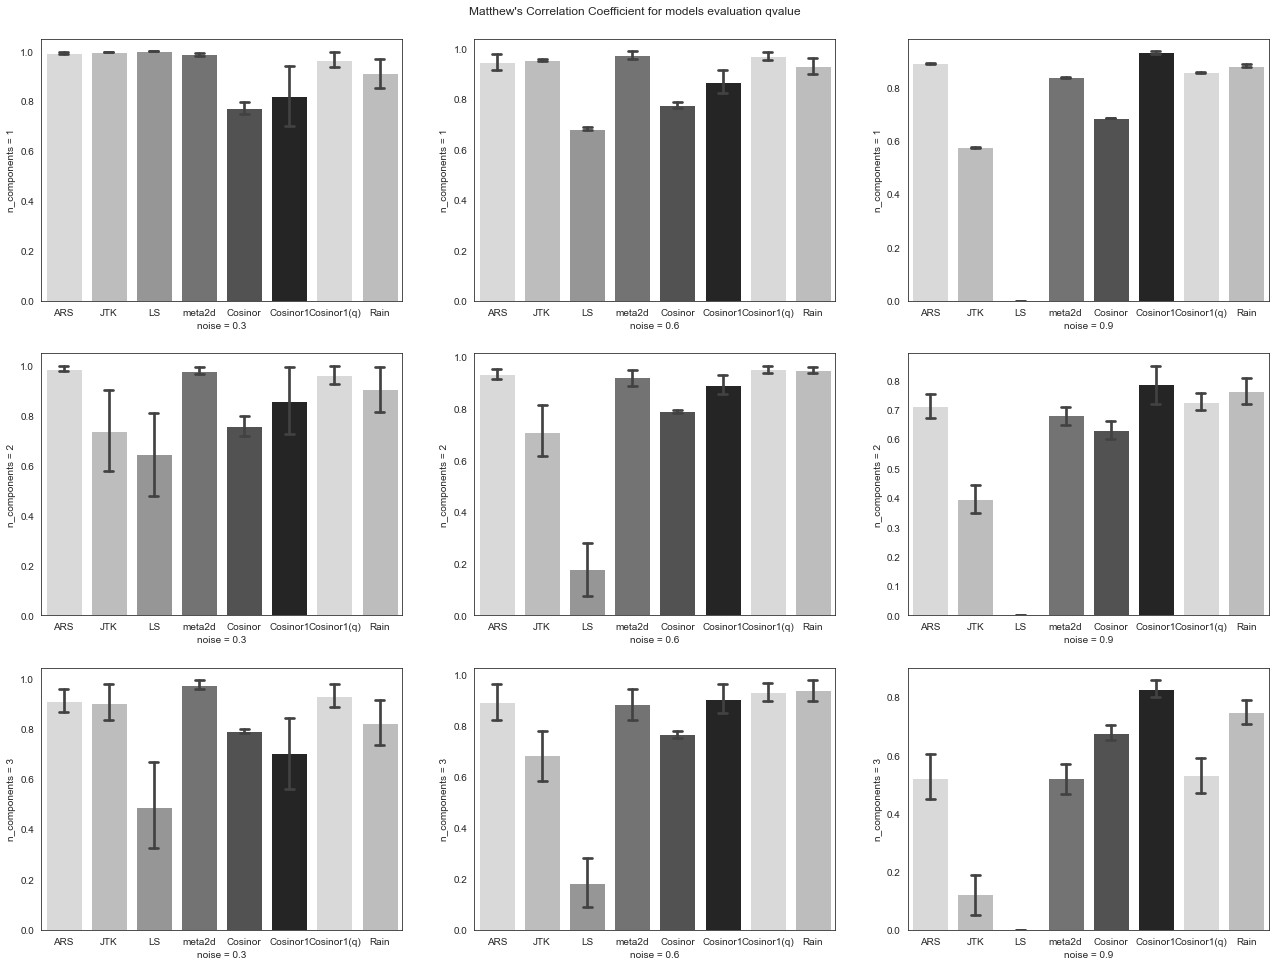

In [56]:
#mcc models evaluation qvalue
ncols = 3
nrows = 3
fig, axes = plt.subplots(ncols = ncols, nrows = nrows, sharey=False)
axes = axes.flatten()         
fig.set_size_inches(22, 15)
sns.set_style("white")
flatui = ['#d9d9d9','#bdbdbd','#969696','#737373','#525252','#252525']
filenames = []
for i in [1,2,3]:
    for j in [1,2,3]:
        filename = f"c{i}_n0{3*j}.csv"
        filenames.append(filename)
for ax, filename in zip(axes,filenames):
            df_metrics = pd.read_csv(f"Out/{filename[:-4]}_t0/qv_metrics_{filename[:-4]}_t0.csv")
            for tnb in range(1,6):
                df_metrics = pd.concat([df_metrics, pd.read_csv(f"Out/{filename[:-4]}_t{tnb}/qv_metrics_{filename[:-4]}_t{tnb}.csv")])
            #sns.barplot(data=df_metrics.drop(index=5,axis=1), x='model', y='mcc', ax=ax, ci=68, capsize=.2, palette=flatui) # ci=68 --> standard error!
            sns.barplot(data=df_metrics, x='model', y='mcc', ax=ax, ci=68, capsize=.2, palette=flatui) # ci=68 --> standard error!
            ax.set_ylabel(f'n_components = {filename[1]}')
            ax.set_xlabel(f'noise = 0.{filename[-5]}')
plt.suptitle(f"Matthew's Correlation Coefficient for models evaluation qvalue")
fig.subplots_adjust(top=0.95)
plt.savefig(f"Out/Images/models_qv_mcc.png", bbox_inches="tight", facecolor='white')
plt.show()

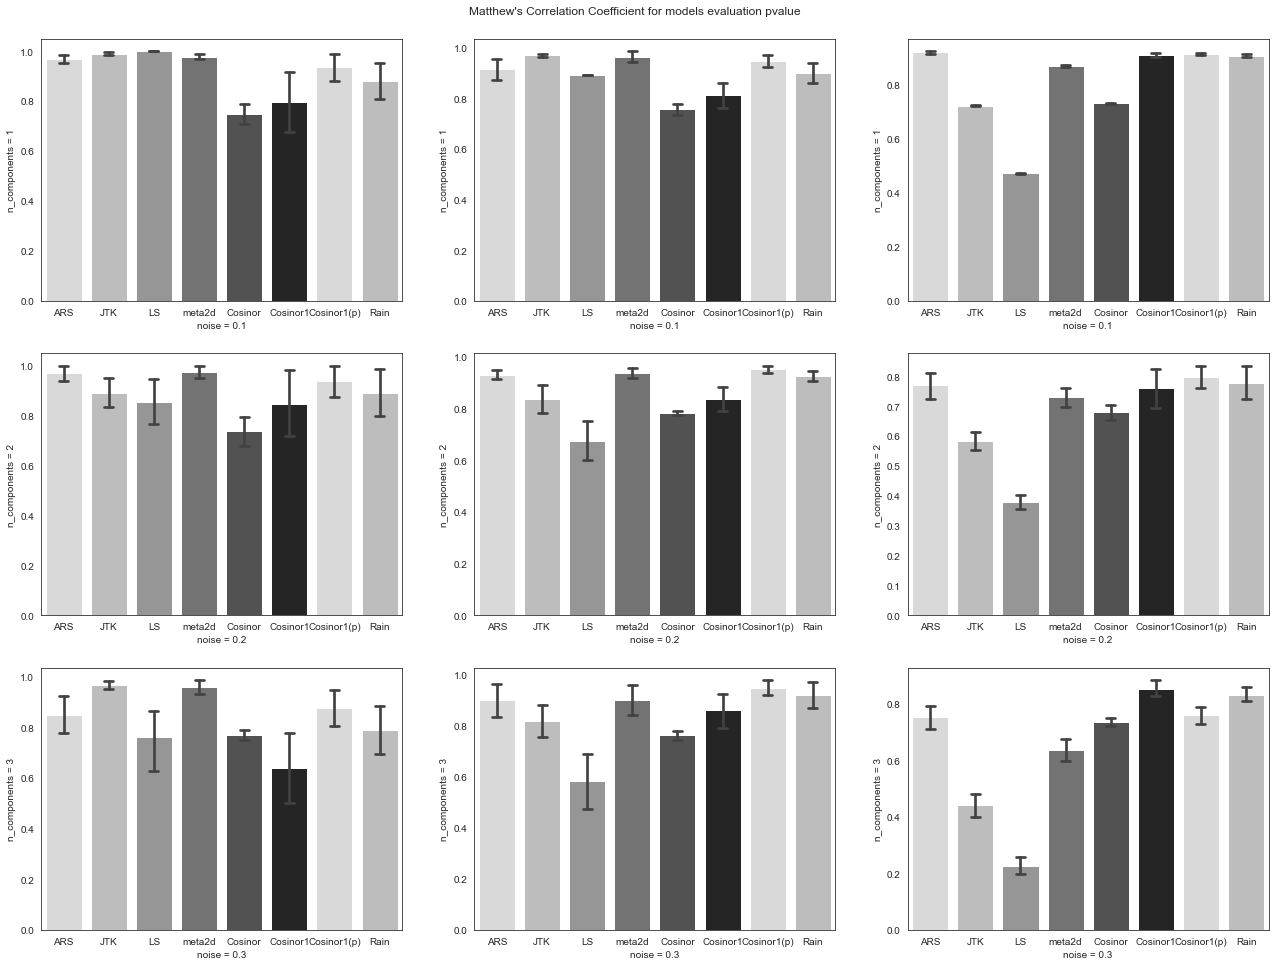

In [57]:
#mcc models evaluation pvalue
ncols = 3
nrows = 3
fig, axes = plt.subplots(ncols = ncols, nrows = nrows, sharey=False)
axes = axes.flatten()         
fig.set_size_inches(22, 15)
sns.set_style("white")
flatui = ['#d9d9d9','#bdbdbd','#969696','#737373','#525252','#252525']
filenames = []
for i in [1,2,3]:
    for j in [1,2,3]:
        filename = f"c{i}_n0{3*j}"
        filenames.append(filename)
for ax, filename in zip(axes,filenames):
            df_metrics = pd.read_csv(f"Out/{filename}_t0/pv_metrics_{filename}_t0.csv")
            for tnb in range(1,6):
                df_metrics = pd.concat([df_metrics, pd.read_csv(f"Out/{filename}_t{tnb}/pv_metrics_{filename}_t{tnb}.csv")])
            #sns.barplot(data=df_metrics.drop(index=5,axis=1), x='model', y='mcc', ax=ax, ci=68, capsize=.2, palette=flatui) # ci=68 --> standard error!
            sns.barplot(data=df_metrics, x='model', y='mcc', ax=ax, ci=68, capsize=.2, palette=flatui) # ci=68 --> standard error!
            ax.set_ylabel(f'n_components = {filename[1]}')
            ax.set_xlabel(f'noise = 0.{filename[-5]}')
plt.suptitle(f"Matthew's Correlation Coefficient for models evaluation pvalue")
fig.subplots_adjust(top=0.95)
plt.savefig(f"Out/Images/models_pv_mcc.png", bbox_inches="tight", facecolor='white')
plt.show()

       auc  precision  recall        f1  accuracy        model       mcc  \
0   0.9988   0.997606  1.0000  0.998801    0.9988          ARS  0.997603   
1   1.0000   1.000000  1.0000  1.000000    1.0000          JTK  1.000000   
2   1.0000   1.000000  1.0000  1.000000    1.0000           LS  1.000000   
3   1.0000   1.000000  1.0000  1.000000    1.0000       meta2d  1.000000   
4   0.9002   0.900200  0.9002  0.900200    0.9002      Cosinor  0.800400   
..     ...        ...     ...       ...       ...          ...       ...   
3   0.6580   0.997481  0.3168  0.480874    0.6580       meta2d  0.432297   
4   0.8591   0.898557  0.8096  0.851762    0.8591      Cosinor  0.721746   
5   0.8770   0.976974  0.7722  0.862601    0.8770     Cosinor1  0.771129   
6   0.6180   0.999154  0.2362  0.382077    0.6180  Cosinor1(q)  0.365501   
7   0.7468   0.992812  0.4972  0.662580    0.7468         Rain  0.569657   

   filename  
0    c1_n03  
1    c1_n03  
2    c1_n03  
3    c1_n03  
4    c1_n03  
.. 

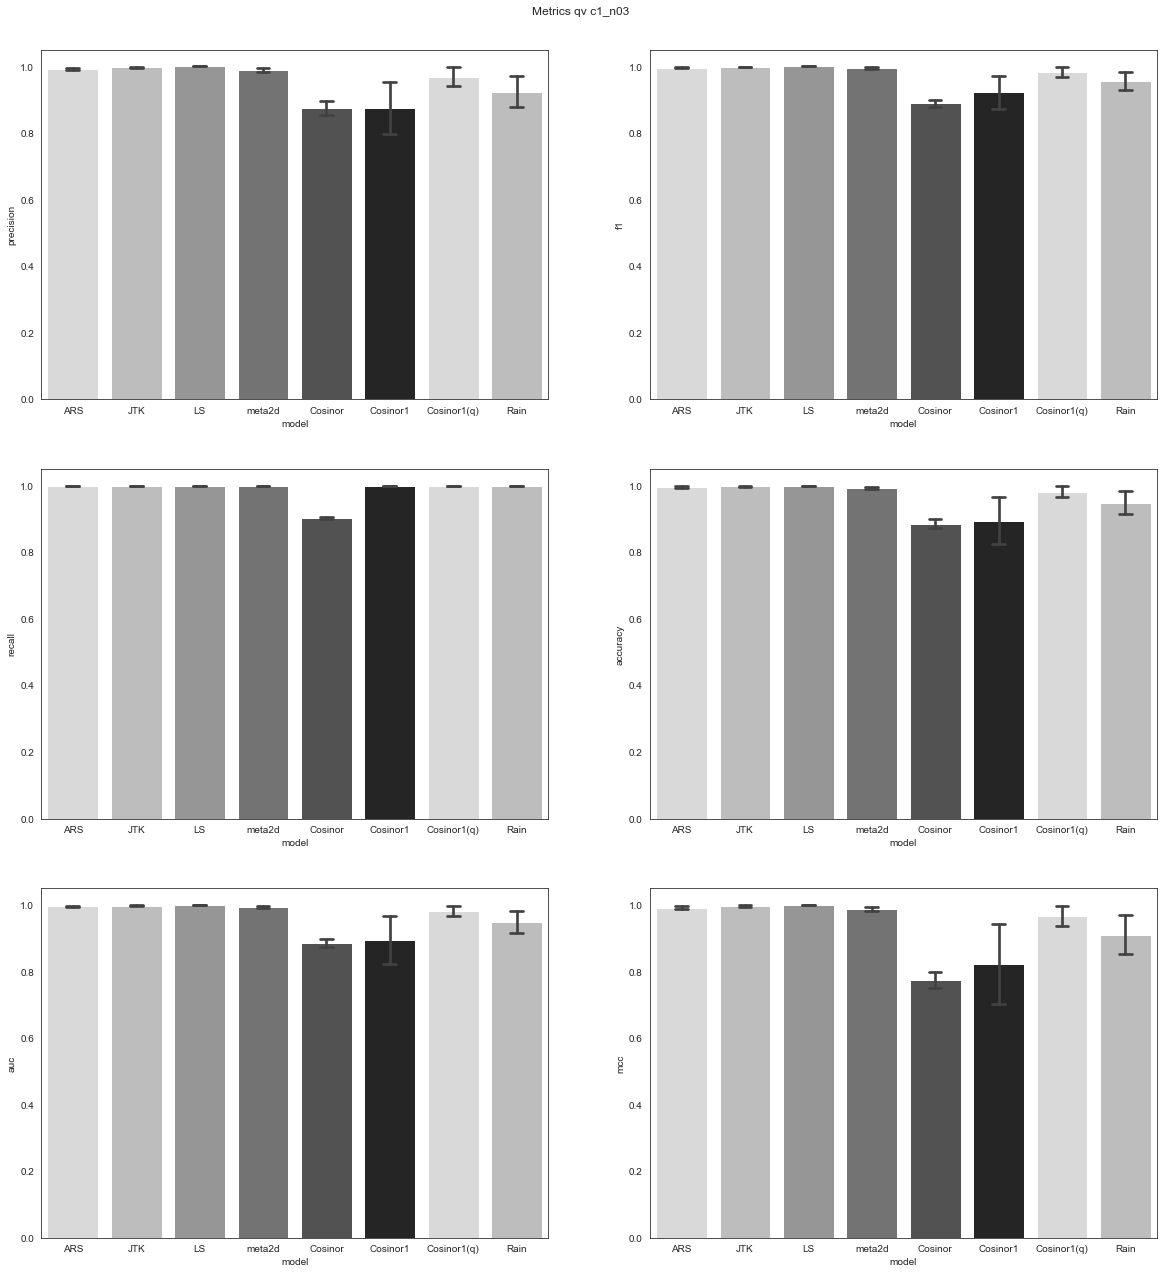

filename c1_n06

      auc  precision  recall        f1  accuracy        model       mcc  \
0  0.9903   0.981915  0.9990  0.990384    0.9903          ARS  0.980748   
1  0.9805   0.999169  0.9618  0.980128    0.9805          JTK  0.961673   
2  0.8292   1.000000  0.6584  0.794018    0.8292           LS  0.700541   
3  0.9940   0.991054  0.9970  0.994018    0.9940       meta2d  0.988018   
4  0.8954   0.892573  0.8990  0.895775    0.8954      Cosinor  0.790820   
5  0.9603   0.926441  1.0000  0.961816    0.9603     Cosinor1  0.923516   
6  0.9946   0.991064  0.9982  0.994619    0.9946  Cosinor1(q)  0.989226   
7  0.9898   0.981518  0.9984  0.989887    0.9898         Rain  0.979745   
0  0.9954   0.991859  0.9990  0.995417    0.9954          ARS  0.990826   
1  0.9783   1.000000  0.9566  0.977819    0.9783          JTK  0.957502   
2  0.8265   1.000000  0.6530  0.790079    0.8265           LS  0.696262   
3  0.9973   0.997399  0.9972  0.997300    0.9973       meta2d  0.994600   
4  0.897

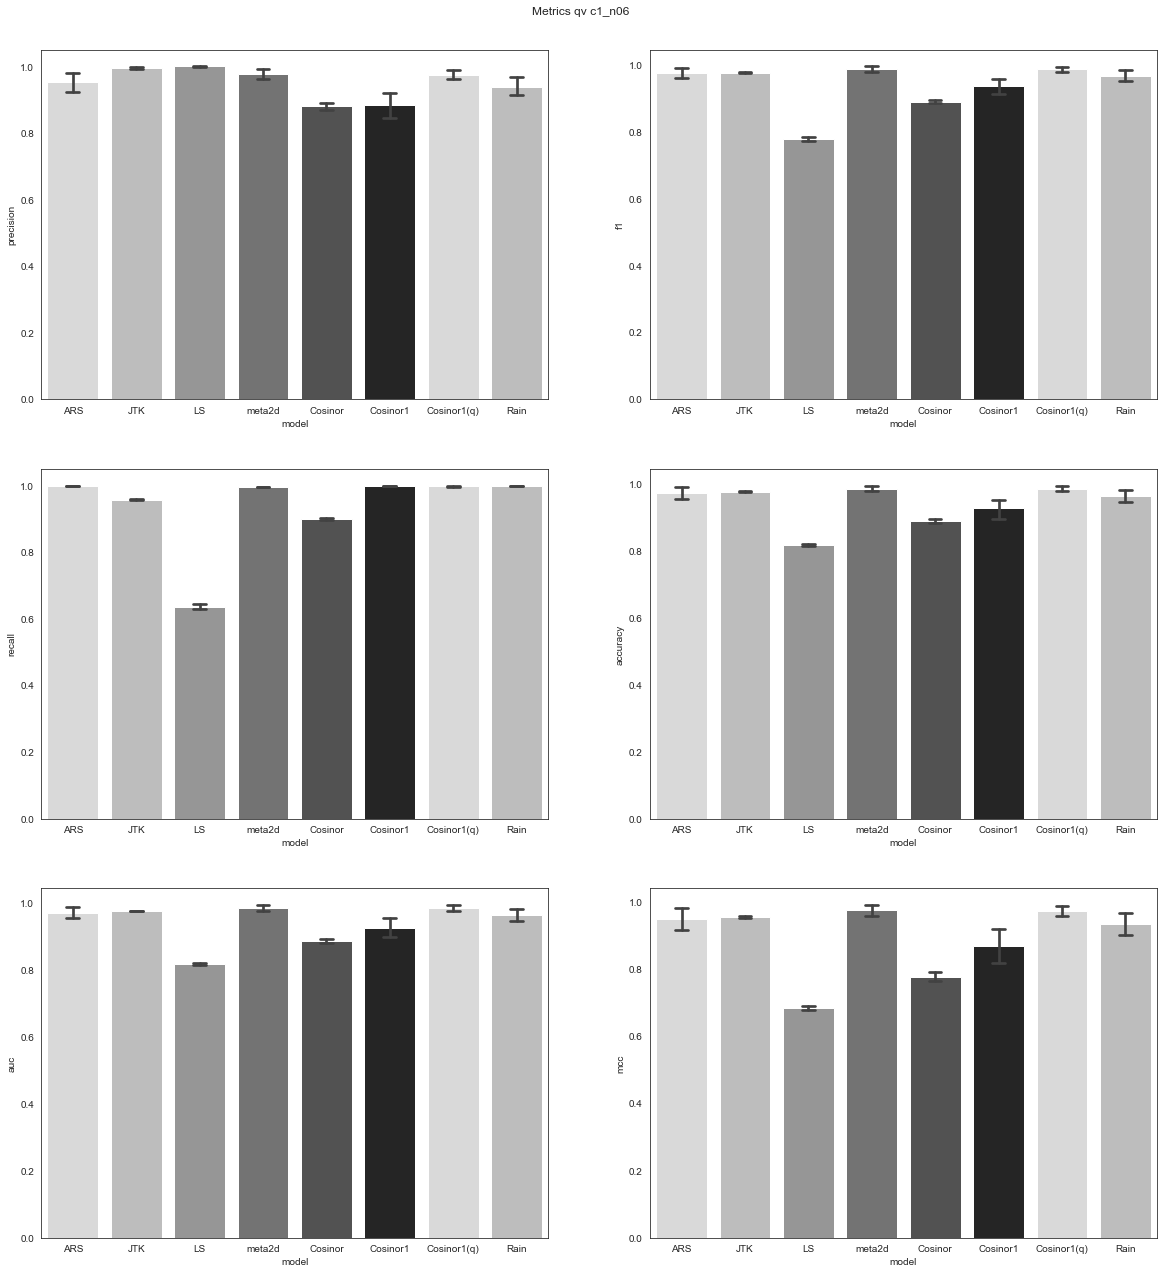

filename c1_n09

      auc  precision  recall        f1  accuracy        model       mcc  \
0  0.9381   0.980689  0.8938  0.935231    0.9381          ARS  0.879659   
1  0.7446   0.997559  0.4904  0.657549    0.7446          JTK  0.568097   
2  0.5000   0.000000  0.0000  0.000000    0.5000           LS  0.000000   
3  0.9079   0.991801  0.8226  0.899311    0.9079       meta2d  0.827937   
4  0.8370   0.897406  0.7610  0.823593    0.8370      Cosinor  0.681924   
5  0.9571   0.948225  0.9670  0.957521    0.9571     Cosinor1  0.914379   
6  0.9186   0.993632  0.8426  0.911905    0.9186  Cosinor1(q)  0.847042   
7  0.9314   0.971372  0.8890  0.928363    0.9314         Rain  0.865919   
0  0.9450   0.991387  0.8978  0.942275    0.9450          ARS  0.893992   
1  0.7534   0.999606  0.5070  0.672771    0.7534          JTK  0.582433   
2  0.5000   0.000000  0.0000  0.000000    0.5000           LS  0.000000   
3  0.9191   0.998098  0.8398  0.912132    0.9191       meta2d  0.848945   
4  0.838

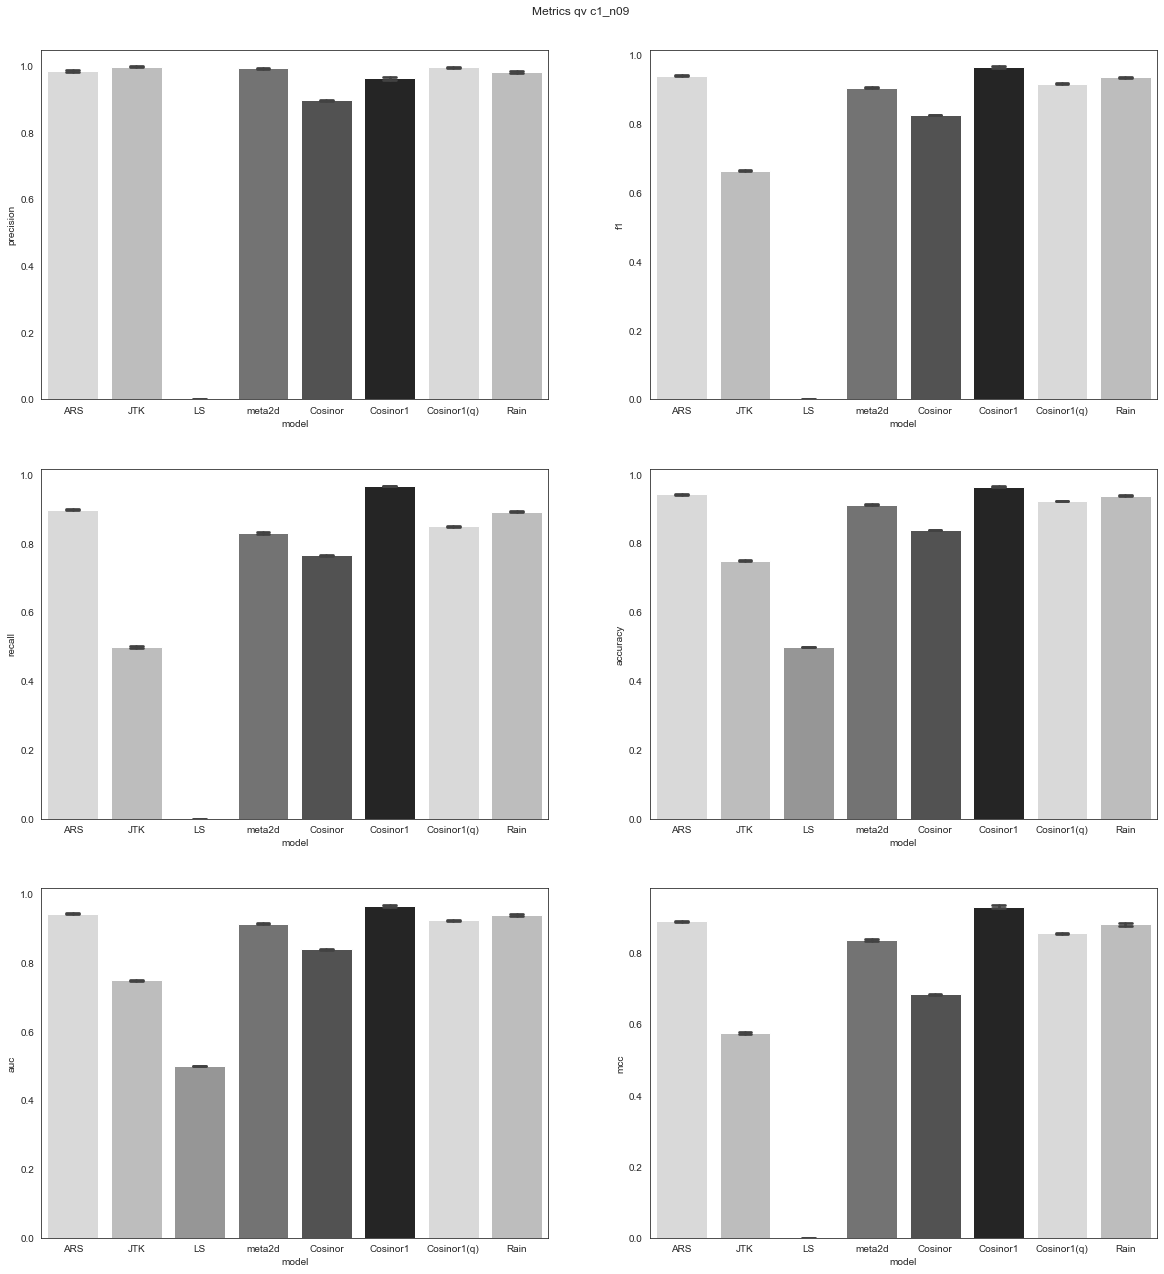

filename c2_n03

      auc  precision  recall        f1  accuracy        model       mcc  \
0  0.9977   1.000000  0.9954  0.997695    0.9977          ARS  0.995411   
1  0.7064   1.000000  0.4128  0.584371    0.7064          JTK  0.509981   
2  0.5000   0.000000  0.0000  0.000000    0.5000           LS  0.000000   
3  0.9934   1.000000  0.9868  0.993356    0.9934       meta2d  0.986886   
4  0.9002   0.900200  0.9002  0.900200    0.9002      Cosinor  0.800400   
5  1.0000   1.000000  1.0000  1.000000    1.0000     Cosinor1  1.000000   
6  1.0000   1.000000  1.0000  1.000000    1.0000  Cosinor1(q)  1.000000   
7  1.0000   1.000000  1.0000  1.000000    1.0000         Rain  1.000000   
0  0.9991   0.999600  0.9986  0.999100    0.9991          ARS  0.998200   
1  0.5000   0.000000  0.0000  0.000000    0.5000          JTK  0.000000   
2  0.5000   0.000000  0.0000  0.000000    0.5000           LS  0.000000   
3  0.9882   1.000000  0.9764  0.988059    0.9882       meta2d  0.976672   
4  0.900

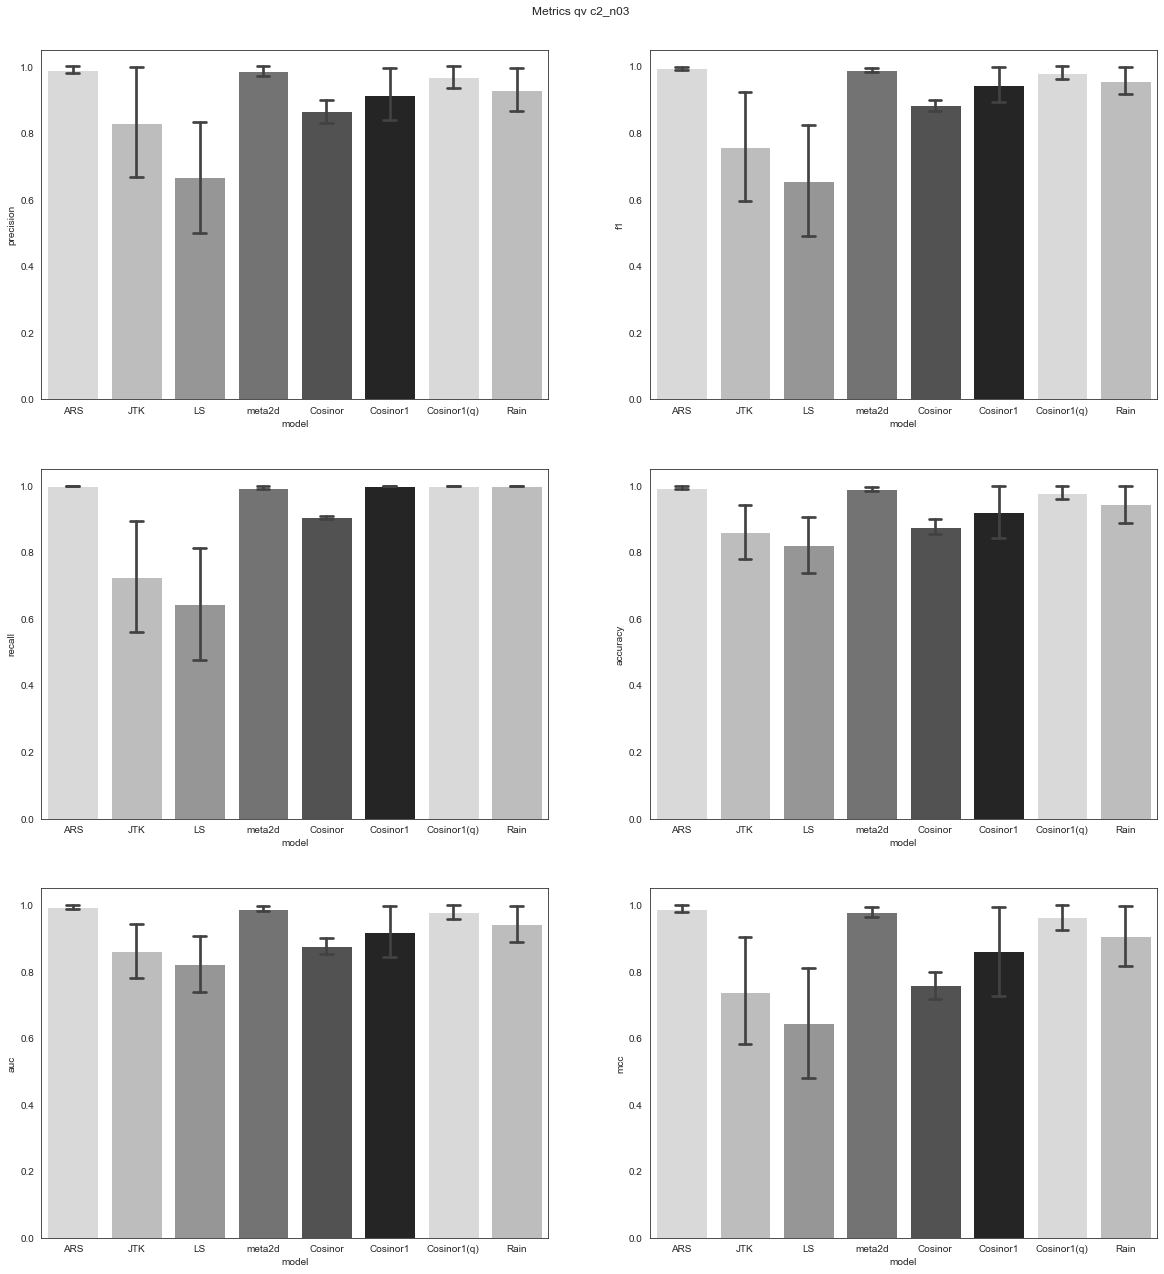

filename c2_n06

      auc  precision  recall        f1  accuracy        model       mcc  \
0  0.9658   0.953642  0.9792  0.966252    0.9658          ARS  0.931935   
1  0.9171   0.999282  0.8348  0.909665    0.9171          JTK  0.845735   
2  0.5000   0.000000  0.0000  0.000000    0.5000           LS  0.000000   
3  0.9782   0.986767  0.9694  0.978006    0.9782       meta2d  0.956548   
4  0.8980   0.897682  0.8984  0.898041    0.8980      Cosinor  0.796000   
5  0.8955   0.827563  0.9992  0.905318    0.8955     Cosinor1  0.808582   
6  0.9795   0.970190  0.9894  0.979701    0.9795  Cosinor1(q)  0.959188   
7  0.9638   0.935575  0.9962  0.964936    0.9638         Rain  0.929554   
0  0.9849   0.992684  0.9770  0.984780    0.9849          ARS  0.969921   
1  0.8998   0.999251  0.8002  0.888716    0.8998          JTK  0.815953   
2  0.5000   0.000000  0.0000  0.000000    0.5000           LS  0.000000   
3  0.9818   0.996701  0.9668  0.981523    0.9818       meta2d  0.964034   
4  0.895

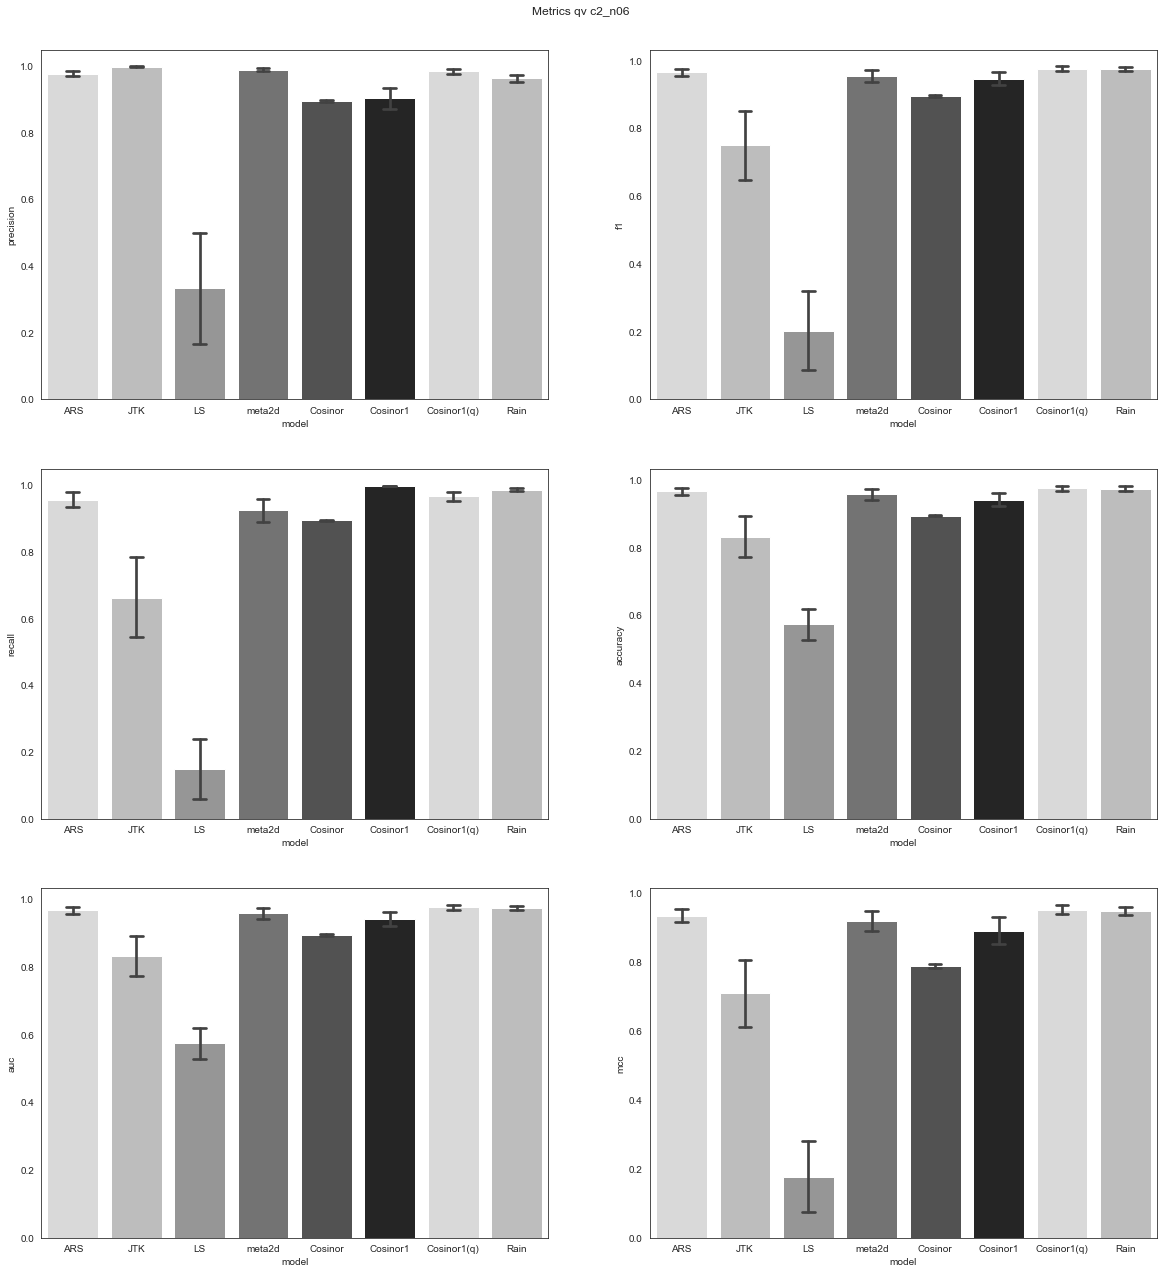

filename c2_n09

      auc  precision  recall        f1  accuracy        model       mcc  \
0  0.9384   0.991039  0.8848  0.934911    0.9384          ARS  0.881882   
1  0.7455   0.999593  0.4912  0.658710    0.7455          JTK  0.570265   
2  0.5000   0.000000  0.0000  0.000000    0.5000           LS  0.000000   
3  0.9066   0.995370  0.8170  0.897408    0.9066       meta2d  0.826580   
4  0.7622   0.897755  0.5918  0.713356    0.7622      Cosinor  0.557792   
5  0.9594   0.958117  0.9608  0.959457    0.9594     Cosinor1  0.918804   
6  0.9174   0.994550  0.8394  0.910412    0.9174  Cosinor1(q)  0.845147   
7  0.9336   0.980071  0.8852  0.930223    0.9336         Rain  0.871292   
0  0.7805   0.999644  0.5612  0.718842    0.7805          ARS  0.624247   
1  0.5372   1.000000  0.0744  0.138496    0.5372          JTK  0.196564   
2  0.5000   0.000000  0.0000  0.000000    0.5000           LS  0.000000   
3  0.7576   0.999612  0.5154  0.680127    0.7576       meta2d  0.588903   
4  0.876

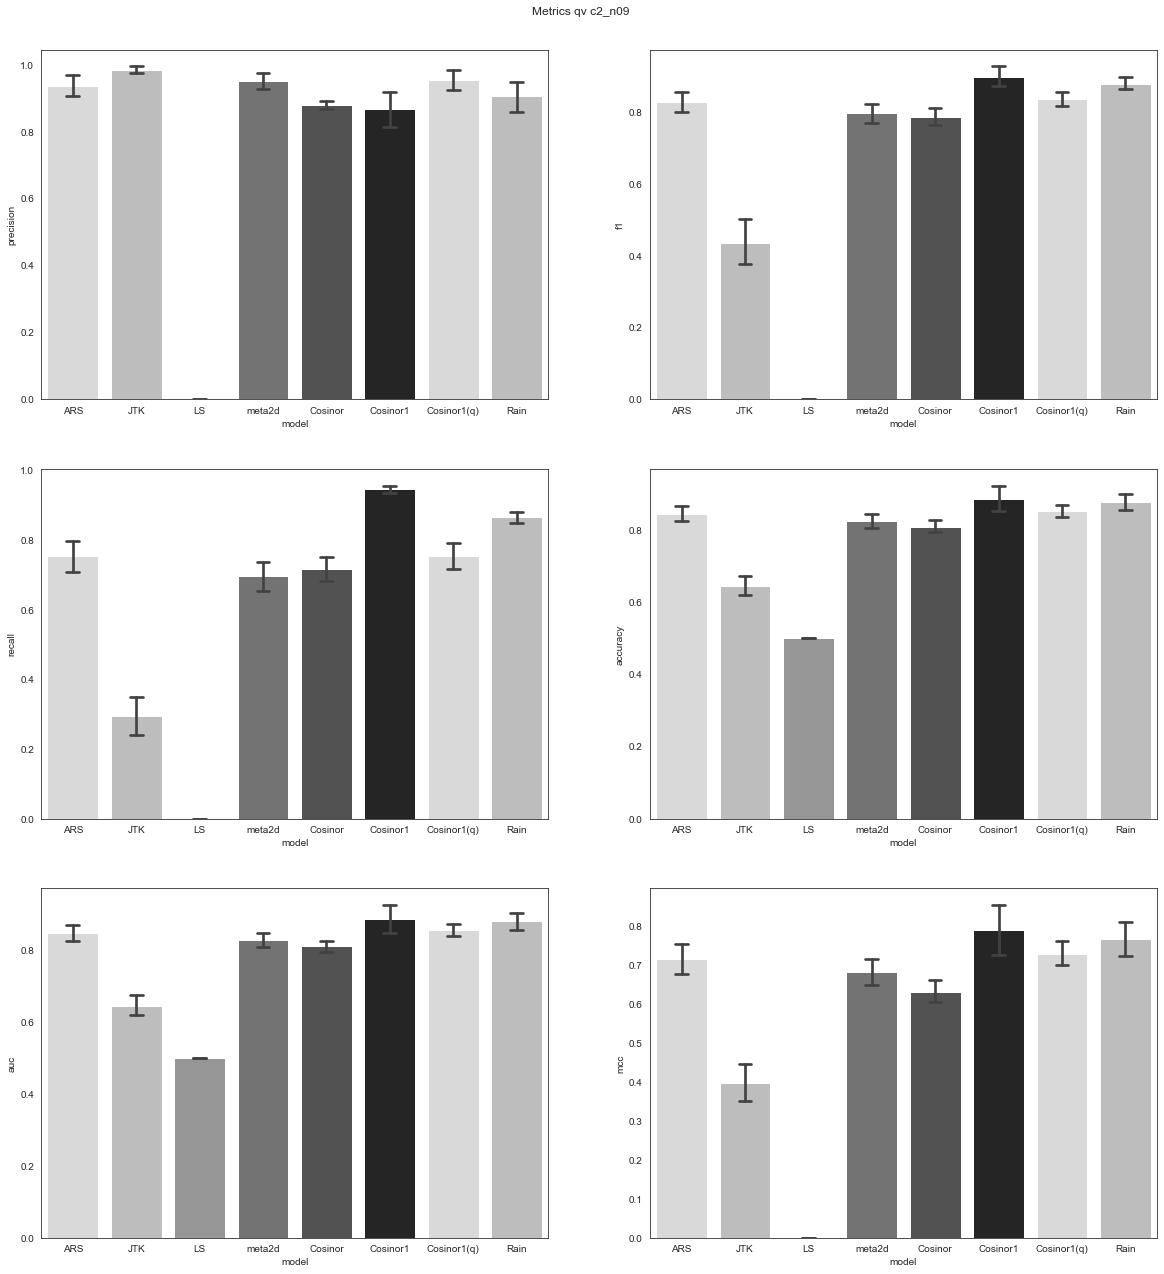

filename c3_n03

      auc  precision  recall        f1  accuracy        model       mcc  \
0  0.9983   1.000000  0.9966  0.998297    0.9983          ARS  0.996606   
1  0.7372   1.000000  0.4744  0.643516    0.7372          JTK  0.557638   
2  0.5000   0.000000  0.0000  0.000000    0.5000           LS  0.000000   
3  0.9943   1.000000  0.9886  0.994267    0.9943       meta2d  0.988664   
4  0.9002   0.900200  0.9002  0.900200    0.9002      Cosinor  0.800400   
5  0.9361   0.886682  1.0000  0.939938    0.9361     Cosinor1  0.879411   
6  0.9989   0.999800  0.9980  0.998899    0.9989  Cosinor1(q)  0.997802   
7  0.9966   0.993246  1.0000  0.996612    0.9966         Rain  0.993223   
0  0.9969   0.993838  1.0000  0.996910    0.9969          ARS  0.993819   
1  0.9856   0.999794  0.9714  0.985393    0.9856          JTK  0.971592   
2  0.5000   0.000000  0.0000  0.000000    0.5000           LS  0.000000   
3  0.9991   0.999000  0.9992  0.999100    0.9991       meta2d  0.998200   
4  0.877

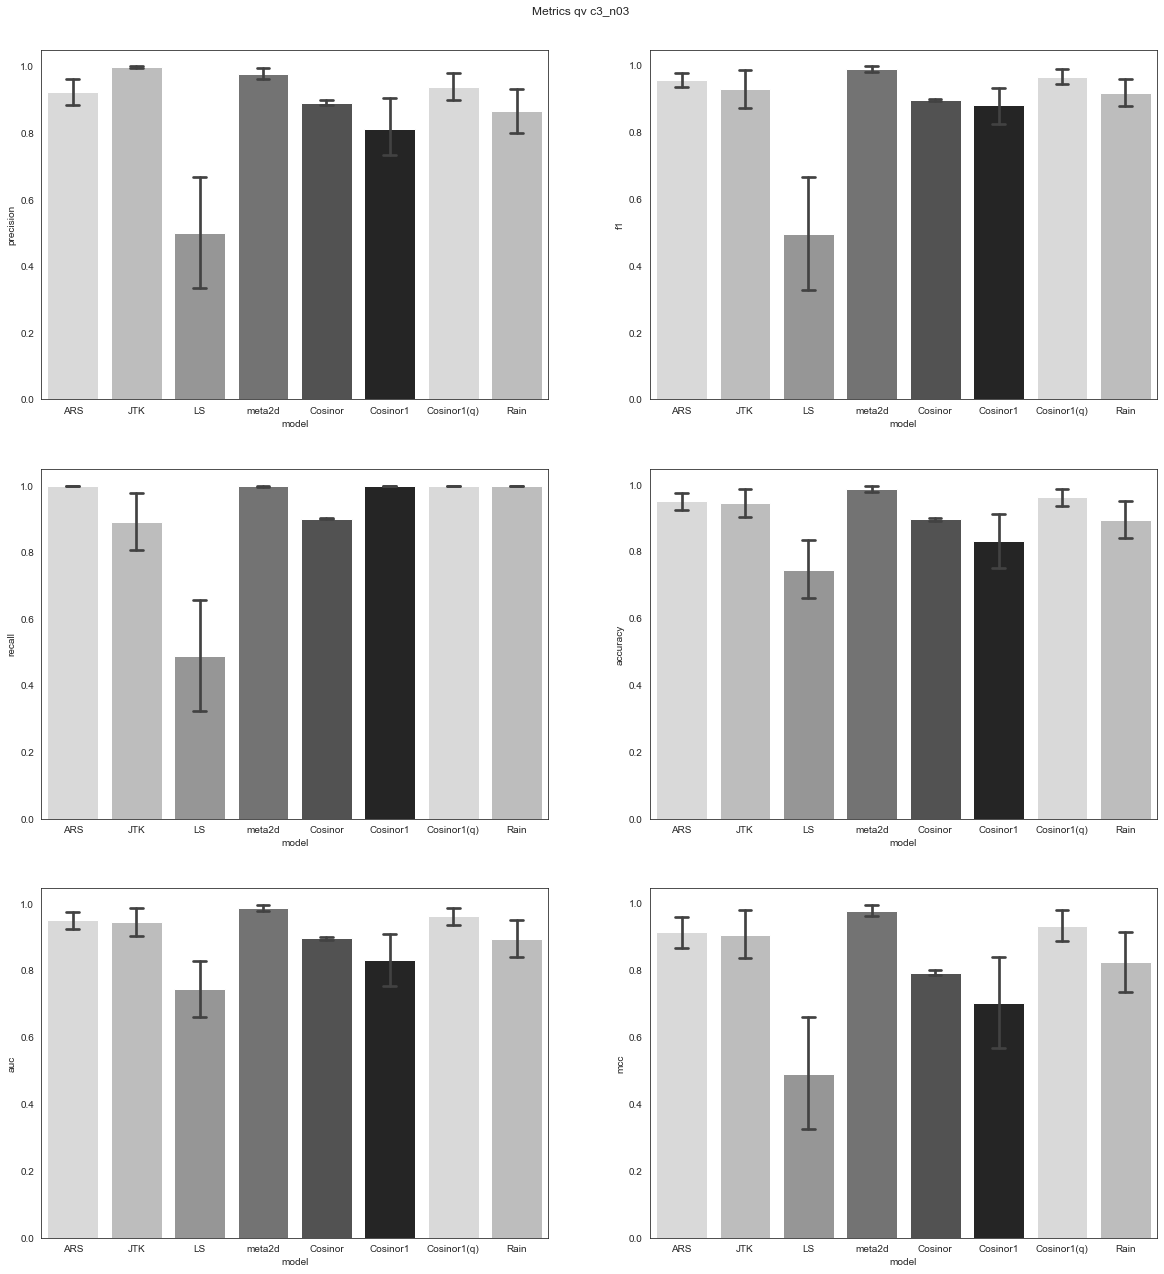

filename c3_n06

      auc  precision  recall        f1  accuracy        model       mcc  \
0  0.9893   0.991166  0.9874  0.989280    0.9893          ARS  0.978607   
1  0.9632   0.999353  0.9270  0.961818    0.9632          JTK  0.928838   
2  0.7478   1.000000  0.4956  0.662744    0.7478           LS  0.573963   
3  0.9921   0.996369  0.9878  0.992066    0.9921       meta2d  0.984236   
4  0.8704   0.892872  0.8418  0.866584    0.8704      Cosinor  0.742015   
5  0.9477   0.905305  1.0000  0.950299    0.9477     Cosinor1  0.900339   
6  0.9922   0.987906  0.9966  0.992234    0.9922  Cosinor1(q)  0.984438   
7  0.9811   0.966453  0.9968  0.981392    0.9811         Rain  0.962675   
0  0.7672   0.846653  0.6526  0.737068    0.7672          ARS  0.549015   
1  0.6158   0.972268  0.2384  0.382910    0.6158          JTK  0.353073   
2  0.5000   0.000000  0.0000  0.000000    0.5000           LS  0.000000   
3  0.7979   0.878911  0.6910  0.773710    0.7979       meta2d  0.609902   
4  0.892

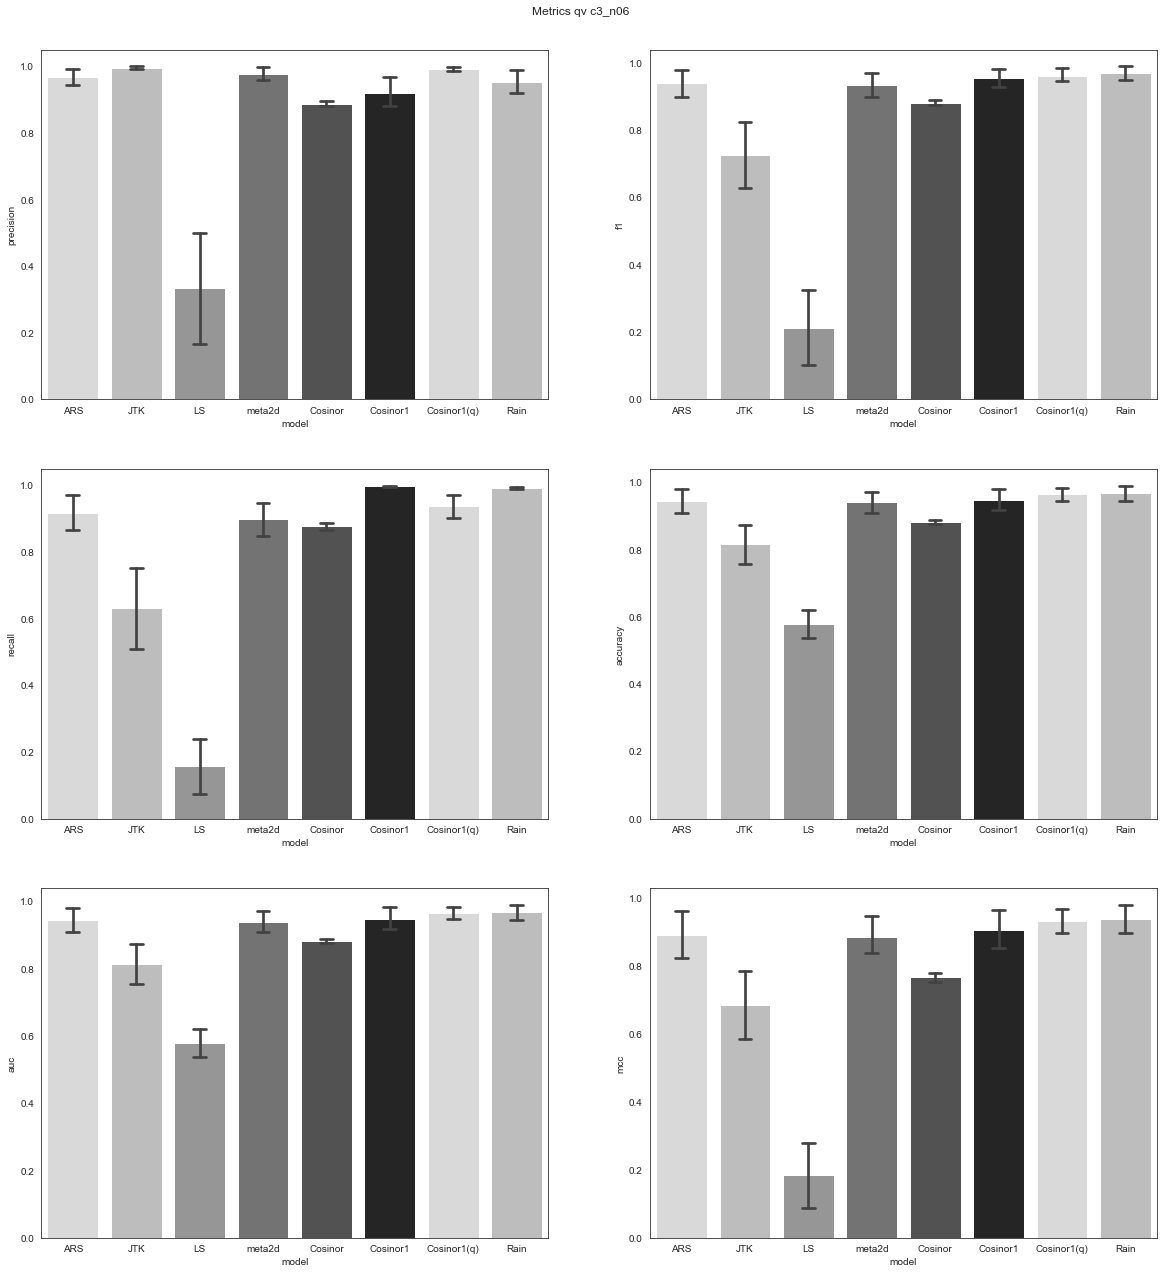

filename c3_n09

      auc  precision  recall        f1  accuracy        model       mcc  \
0  0.9100   0.997573  0.8220  0.901316    0.9100          ARS  0.833003   
1  0.6610   1.000000  0.3220  0.487141    0.6610          JTK  0.438058   
2  0.5000   0.000000  0.0000  0.000000    0.5000           LS  0.000000   
3  0.8624   0.999174  0.7254  0.840556    0.8624       meta2d  0.753642   
4  0.7650   0.896469  0.5992  0.718293    0.7650      Cosinor  0.561786   
5  0.9645   0.983150  0.9452  0.963801    0.9645     Cosinor1  0.929693   
6  0.8736   0.999465  0.7476  0.855378    0.8736  Cosinor1(q)  0.772118   
7  0.9238   0.992562  0.8540  0.918082    0.9238         Rain  0.855982   
0  0.8210   0.996904  0.6440  0.782503    0.8210          ARS  0.686451   
1  0.5494   1.000000  0.0988  0.179833    0.5494          JTK  0.227963   
2  0.5000   0.000000  0.0000  0.000000    0.5000           LS  0.000000   
3  0.7773   0.998203  0.5556  0.713864    0.7773       meta2d  0.618750   
4  0.805

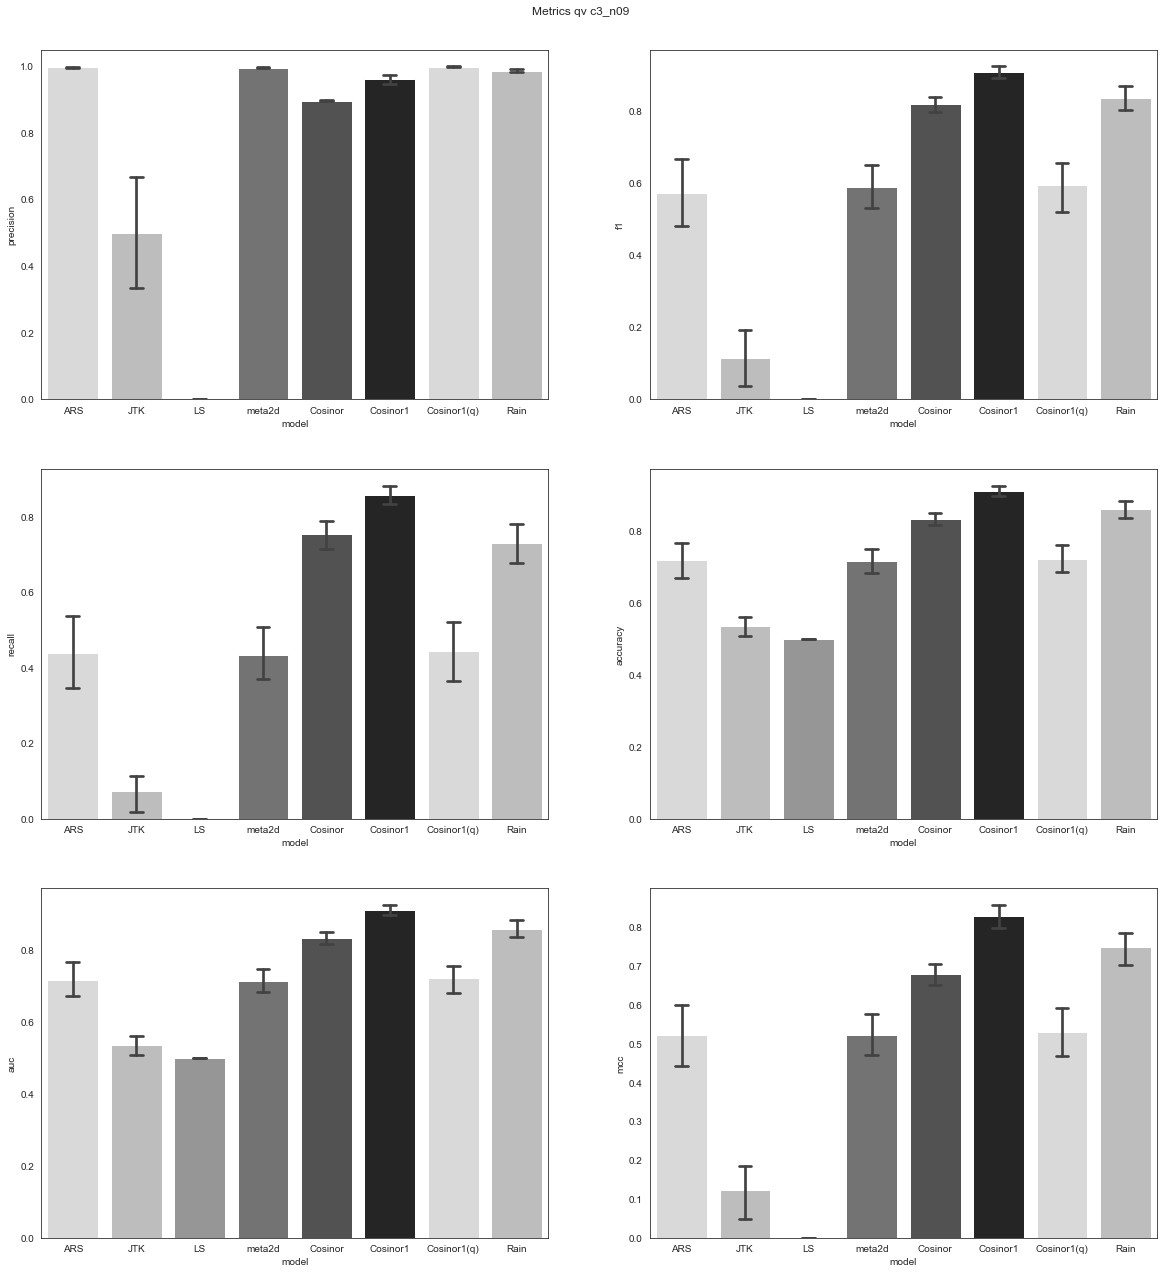

In [60]:
#metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df_metrics= pd.DataFrame()
for x in range(6):
    for i in [1,2,3]:
        for j in [1,2,3]:
            filename=f"c{i}_n0{3*j}_t{x}"
            df_tmp = pd.read_csv(f"Out/{filename}/qv_metrics_{filename}.csv")
            df_tmp['filename']=filename[:-3]
            df_metrics =pd.concat([df_metrics,df_tmp])
print(df_metrics)
sns.set_style("white")
flatui = ['#d9d9d9','#bdbdbd','#969696','#737373','#525252','#252525']
ncols = 2
nrows = 3
metrics = ["precision", "f1", "recall", "accuracy", "auc", "mcc"]
filenames = []
for i in [1,2,3]:
    for j in [1,2,3]:
        filename = f"c{i}_n0{3*j}"
        filenames.append(filename)
print('filenames',filenames)
for filename in filenames:
    print('filename',filename)
    print()
    print(df_metrics[df_metrics['filename']==filename])
    fig, axes = plt.subplots(ncols = ncols, nrows = nrows, sharey=False)
    axes = axes.flatten()         
    fig.set_size_inches(20, 20)
    for ax, metric in zip(axes, metrics):
        sns.barplot(data=df_metrics[df_metrics['filename']==filename], x='model', y=metric, ax=ax, ci=68, capsize=.2,palette=flatui) # ci=68 --> standard error!
        ax.set_ylabel(metric)
    plt.suptitle(f'Metrics qv {filename}')
    fig.subplots_adjust(top=0.95)
    plt.savefig(f"Out/Images/{filename}_qv_metrics.png", bbox_inches="tight", facecolor='white')
    plt.show()

Plot models metrics on a dataset

In [ ]:
#pv
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df_metrics= pd.DataFrame()
for i in [1,2,3]:
    for j in [1,2,3]:
        filename=f"c{i}_n0{3*j}_t5.csv"
        df_tmp = pd.read_csv(f"Out/{filename[:-4]}/pv_metrics_{filename[:-4]}.csv")
        df_tmp['filename']=filename
        df_metrics =pd.concat([df_metrics,df_tmp])
sns.set_style("white")
flatui = ['#d9d9d9','#bdbdbd','#969696','#737373','#525252','#252525']
ncols = 2
nrows = 3
metrics = ["precision", "f1", "recall", "accuracy", "auc", "mcc"]
filenames = []
for i in [1,2,3]:
    for j in [1,2,3]:
        filename = f"c{i}_n0{3*j}_t5.csv"
        filenames.append(filename)
for filename in filenames:
    fig, axes = plt.subplots(ncols = ncols, nrows = nrows, sharey=False)
    axes = axes.flatten()         
    fig.set_size_inches(20, 20)
    for ax, metric in zip(axes, metrics):
        sns.barplot(data=df_metrics[df_metrics['filename']==filename], x='model', y=metric, ax=ax, ci=68, capsize=.2,palette=flatui) # ci=68 --> standard error!
        ax.set_ylabel(metric)
    plt.suptitle(f'Metrics pv {filename[:-4]}')
    fig.subplots_adjust(top=0.95)
    plt.savefig(f"Out/{filename[:-4]}/{filename[:-4]}_pv_metrics.png", bbox_inches="tight", facecolor='white')
    plt.show()

In [ ]:
#qv
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df_metrics= pd.DataFrame()
for i in [1,2,3]:
    for j in [1,2,3]:
        filename=f"c{i}_n0{3*j}_t5.csv"
        df_tmp = pd.read_csv(f"Out/{filename[:-4]}/qv_metrics_{filename[:-4]}.csv")
        df_tmp['filename']=filename
        df_metrics =pd.concat([df_metrics,df_tmp])
sns.set_style("white")
flatui = ['#d9d9d9','#bdbdbd','#969696','#737373','#525252','#252525']
ncols = 2
nrows = 3
metrics = ["precision", "f1", "recall", "accuracy", "auc", "mcc"]
filenames = []
for i in [1,2,3]:
    for j in [1,2,3]:
        filename = f"c{i}_n0{3*j}_t5.csv"
        filenames.append(filename)
for filename in filenames:
    fig, axes = plt.subplots(ncols = ncols, nrows = nrows, sharey=False)
    axes = axes.flatten()         
    fig.set_size_inches(20, 20)
    for ax, metric in zip(axes, metrics):
        sns.barplot(data=df_metrics[df_metrics['filename']==filename], x='model', y=metric, ax=ax, ci=68, capsize=.2,palette=flatui) # ci=68 --> standard error!
        ax.set_ylabel(metric)
    plt.suptitle(f'Metrics qv {filename[:-4]}')
    fig.subplots_adjust(top=0.95)
    plt.savefig(f"Out/{filename[:-4]}/{filename[:-4]}_qv_metrics.png", bbox_inches="tight", facecolor='white')
    plt.show()

Plot model metrics on different dataset

In [ ]:
#global models evaluation
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df_metrics= pd.DataFrame()
for i in [1,2,3]:
    for j in [1,2,3]:
        filename=f"c{i}_n0{3*j}.csv"
        df_tmp = pd.read_csv(f"Out/{filename[:-4]}/qv_metrics_{filename[:-4]}.csv")
        df_tmp['filename']=filename[:-4]
        df_metrics =pd.concat([df_metrics,df_tmp])
sns.set_style("white")
flatui = ['#d9d9d9','#bdbdbd','#969696','#737373','#525252','#252525']
ncols = 2
nrows = 3
models = ['ARS','JTK','LS','meta2d','Cosinor','Rain','Cosinor1','Cosinor1(amp)']
metrics = ["precision", "f1", "recall", "accuracy", "auc", "mcc"]
for model in models:
    fig, axes = plt.subplots(ncols = ncols, nrows = nrows, sharey=False)
    axes = axes.flatten()         
    fig.set_size_inches(16, 16)
    for ax, metric in zip(axes, metrics):
        sns.barplot(data=df_metrics, x='filename', y=metric, ax=ax, ci=68, capsize=.2, palette=flatui) # ci=68 --> standard error!
        #ax.set_xticklabels(df['filename'].to_numpy(), rotation=45)
        ax.set_ylabel(metric)
    plt.suptitle(model)
    fig.subplots_adjust(top=0.95)
    plt.savefig(f"Out/{model}_qv_metrics.png", bbox_inches="tight",facecolor='white')

    plt.show()

## Plot standard deviation

Plot table of the global standard deviation of each models

In [ ]:
#global std
import pandas as pd
import numpy as np
import plotly.figure_factory as ff
df_after_ind= pd.DataFrame()
for i in [1,2,3]:
    for j in [1,2,3]:
        filename=f"c{i}_n0{3*j}.csv"
        df_after = pd.read_csv(f"Out/{filename[:-4]}/qv_metrics_{filename[:-4]}.csv")
        df_after['filename']=filename
        df_after_ind =pd.concat([df_after_ind,df_after])
sns.set_style("white")
flatui = ['#d9d9d9','#bdbdbd','#969696','#737373','#525252','#252525']
models = ['ARS','JTK','LS','meta2d','Cosinor','Rain','Cosinor1']
metrics = ["precision", "f1", "recall", "accuracy", "auc"]
df = pd.DataFrame(columns = ['model','avg_std'], dtype=float)
for model in models:
    res=[]
    for metric in metrics:
        std = df_after_ind[df_after_ind['model']==model][metric].std()
        res.append(std)
        #print(model,metric,std°
    #print(res)
    df =df.append({'model':model,'avg_std': np.array(res).mean()}, ignore_index=True)
fig1 = ff.create_table(df.sort_values(by='avg_std'))
fig1.update_layout(width=500, height=300)
fig1.show()

Plot table of standard deviation for a fixed number of cosinor components

In [ ]:
#std fixed number of components
import pandas as pd
import numpy as np
import plotly.figure_factory as ff
for i in [1,2,3]:
    df_metrics= pd.DataFrame()
    df = pd.DataFrame(columns = ['model'], dtype=float)
    for j in [1,2,3]:
        filename=f"c{i}_n0{3*j}.csv"
        df_tmp = pd.read_csv(f"Out/{filename[:-4]}/qv_metrics_{filename[:-4]}.csv")
        df_tmp['filename']=filename
        df_metrics =pd.concat([df_metrics,df_tmp])
    models = ['ARS','JTK','LS','meta2d','Cosinor','Rain','Cosinor1','Cosinor1(amp)']
    metrics = ["precision", "f1", "recall", "accuracy", "auc"]
    sns.set_style("white")
    flatui = ['#d9d9d9','#bdbdbd','#969696','#737373','#525252','#252525']
    df = pd.DataFrame(columns = ['model'], dtype=float)
    #print(df_after_ind)
    for model in models:
        res=[]
        for metric in metrics:
            std = df_metrics[df_metrics['model']==model][metric].std()
            res.append(std)
            #print(model,metric,std)
        df =df.append({'model':model,f'avg_std_c{i}': np.array(res).mean()}, ignore_index=True)
    fig1 = ff.create_table(df.sort_values(by=f'avg_std_c{i}'))
    fig1.update_layout(width=1000, height=300)
    fig1.show()

Plot table of standard deviation for a fixed level of noise

In [ ]:
#std fixe tmp
import pandas as pd
import numpy as np
import plotly.figure_factory as ff

for j in [1,2,3]:
    df_metrics= pd.DataFrame()
    df = pd.DataFrame(columns = ['model'], dtype=float)
    for i in [1,2,3]:
        filename=f"c{i}_n0{3*j}.csv"
        df_tmp = pd.read_csv(f"Out/{filename[:-4]}/qv_metrics_{filename[:-4]}.csv")
        df_tmp['filename']=filename
        df_metrics =pd.concat([df_metrics,df_tmp])
    models = ['ARS','JTK','LS','meta2d','Cosinor','Rain','Cosinor1','Cosinor1(amp)']
    metrics = ["precision", "f1", "recall", "accuracy", "auc"]
    df = pd.DataFrame(columns = ['model'], dtype=float)
    #print(df_after_ind)
    for model in models:
        res=[]
        for metric in metrics:
            std = df_metrics[df_metrics['model']==model][metric].std()
            res.append(std)
            #print(model,metric,std)
        df =df.append({'model':model,f'avg_std_n0{3*j}': np.array(res).mean()}, ignore_index=True)
    fig1 = ff.create_table(df.sort_values(by=f'avg_std_n0{3*j}'))
    fig1.update_layout(width=1000, height=300)
    fig1.show()